In [1]:
import seaborn

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import linear as lr

In [2]:
%env CUDA_VISIBLE_DEVICES=[]

env: CUDA_VISIBLE_DEVICES=[]


# Linear Regression (continious target)

In [3]:
def load_linear_data(num_samples):
    ''' load some data '''
    features = np.random.random_sample([num_samples, NUM_DIM])
    weights = np.random.random_sample([NUM_DIM])
    xw = np.dot(features, weights)
    labels = np.random.normal(num_samples) + xw
    labels = np.reshape(labels, [num_samples, 1])
    return features, labels

In [4]:
BATCH_SIZE = 100
TRAINING_EPOCHS = 500

In [5]:
data = lr.load_linear_data(500)
my_dataset = lr.load_dataset(data[0].shape[0])

In [6]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
cost_history = []

In [7]:
my_dataset.train.p \
    .load(data) \
    .preprocess_linear_data() \
    .train_linear(sess, cost_history) \
    .run(BATCH_SIZE, shuffle=True, n_epochs=TRAINING_EPOCHS)

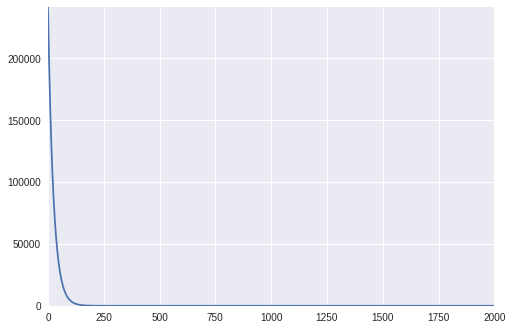

In [8]:
lr.plot_cost(cost_history)

In [10]:
mse = []
y_pred = np.zeros([len(my_dataset.test.indices), 1])
y_true = np.zeros([len(my_dataset.test.indices), 1])
x_features = np.zeros([len(my_dataset.test.indices), 13])

In [11]:
test_batch = my_dataset.test.p. \
    load(data) \
    .test_linear(sess, y_true, y_pred, mse, x_features) \
    .run(len(my_dataset.test.indices))

## Оценка качества

In [12]:
print ('Variance ratio: %.2f' % (np.var(y_pred, ddof=1) /np.var(y_true, ddof=1)))

Variance ratio: 0.07


In [13]:
print ('The model\'s error is distibuted in the interval: {0:.2f} $ ± {1:.2f} $'.format(np.mean(np.abs(y_pred - y_true)),  3*np.std(np.abs(y_pred - y_true))))

The model's error is distibuted in the interval: 0.77 $ ± 1.14 $


In [14]:
 print ('The model\'s error with respect to data\'s mean is: {0:.2f}%'.format(np.mean(np.abs(y_pred - y_true)/y_true)*100))

The model's error with respect to data's mean is: 0.15%


# Logistic Regression (Binary target)

In [35]:
data = lr.load_random_data(blobs=False)
data = lr.preprocess_logistic_data(data)
my_dataset = lr.load_dataset(data[0].shape[0])

In [36]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
cost_history = []
acc_history = []

In [37]:
my_dataset.train.p \
    .load(data) \
    .train_logistic(sess, cost_history, acc_history) \
    .run(BATCH_SIZE, shuffle=True, n_epochs=TRAINING_EPOCHS)

## Оценка качества

In [39]:
acc = []
test_batch = my_dataset.test.p.load(data).test_logistic(sess, acc).run(len(my_dataset.test.indices))

In [40]:
print("ACCURACY: %.0f%%" % (100.0 * acc[0]))

ACCURACY: 95%


# Poisson Regression (discret target)

In [82]:
data = lr.load_poisson_data()
my_dataset = lr.load_dataset(data[1].shape[0])

In [83]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
cost_history = []

In [84]:
my_dataset.train.p \
    .load(data[1:]) \
    .train_poisson(sess, cost_history) \
    .run(BATCH_SIZE, shuffle=True, n_epochs=TRAINING_EPOCHS)

In [85]:
logit = np.zeros([len(my_dataset.test.indices), 1])
y_true = np.zeros([len(my_dataset.test.indices), 1])
weights = np.zeros(data[0].shape)

In [86]:
test_batch = my_dataset.test.p.load(data[1:]).test_poisson(sess, y_true, logit, weights).run(len(my_dataset.test.indices))

## Оценка качества

In [88]:
lmbd = np.dot(data[1], data[0])
print ('Variance ratio: %.2f' % (np.var(logit, ddof=1) / np.var(lmbd, ddof=1)))

Variance ratio: 0.50


In [98]:
 print ('The model\'s error with respect to data\'s mean is: {0:.2f}%'.format(np.mean(np.abs(np.exp(logit) - y_true))/np.mean(y_true)*100))

The model's error with respect to data's mean is: 22.38%
